## Data Import From MySQL database



In [69]:
import MySQLdb.cursors
import numpy as np
import pandas as pd
import sys
import csv
from pandas.io import sql
from scipy.stats import chi2_contingency
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

In [70]:
#Values for database connection
dsn_database = "" 
dsn_hostname = ""
dsn_port = 3306
dsn_uid = ""
dsn_pwd = ""

In [71]:
#Initiate connection
conn = MySQLdb.connect(host=dsn_hostname, port=dsn_port, user=dsn_uid, passwd=dsn_pwd, db=dsn_database)

In [72]:
#Below code will query MySQL database and get rid for nulls
df = sql.read_sql("SELECT Age, City, Gender, Affinity_Category, Reserve_Button FROM unpaid_media.web_model WHERE City != '(not set)'", con=conn)

#Query data from MySQL and transform into a csv file, just for fun!
cursor=conn.cursor()
query = ("SELECT Age, City, Gender, Affinity_Category, Reserve_Button FROM unpaid_media.web_model WHERE City != '(not set)'")
cursor.execute(query)
rows = cursor.fetchall()
fp = open('../Part 3/file.csv', 'w')
myfile = csv.writer(fp, lineterminator='\n')
myfile.writerow([i[0] for i in cursor.description])
myfile.writerows(rows)
fp.close()

cursor.close()
conn.close()

In [75]:
#Read csv file that was exported from MySql database, just for fun!
df_csv = pd.read_csv("../Part 3/file.csv")
print "CSV Dataframe:"
print df_csv.head()
print
print "DB Dataframe:"
print df.head()

CSV Dataframe:
     Age         City Gender  \
0  25-34  Los Angeles   male   
1  25-34  Los Angeles   male   
2  25-34  Los Angeles   male   
3  25-34  Los Angeles   male   
4  25-34  Los Angeles   male   

                                   Affinity_Category  Reserve_Button  
0                                       Technophiles              57  
1                                          TV Lovers              54  
2  News Junkies/Entertainment & Celebrity News Ju...              57  
3                                       Movie Lovers              46  
4                                       Travel Buffs              50  

DB Dataframe:
     Age         City Gender  \
0  25-34  Los Angeles   male   
1  25-34  Los Angeles   male   
2  25-34  Los Angeles   male   
3  25-34  Los Angeles   male   
4  25-34  Los Angeles   male   

                                   Affinity_Category  Reserve_Button  
0                                       Technophiles              57  
1               

## Exploratory Data Analysis & Visualization

In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

1 . The visual below tells us that both Age and Gender has an infleunce in the expected number of Reservation_Button clicks. There's no suprise that males have a stronger attraction to the product.

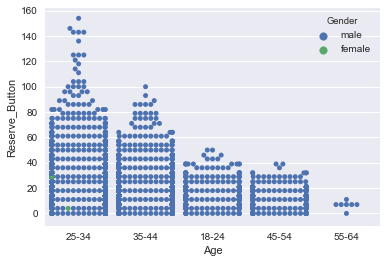

In [45]:
sns.swarmplot(x="Age", y="Reserve_Button", hue="Gender", data=df);

2 . The visual below only confirms that the number of observations for each gender is heavier on the male side. 

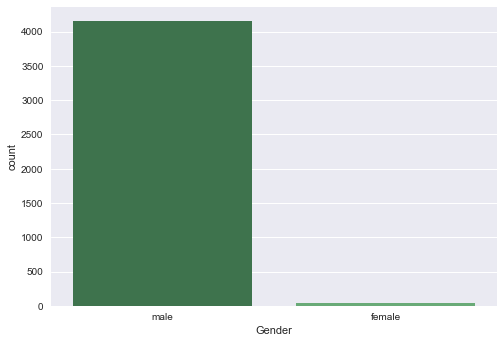

In [7]:
sns.countplot(x="Gender", data=df, palette="Greens_d");

3 . The visualization below lists the various Affinity_Catgories by Age and Reserve_Button. Affinity segments are diverse and appear to be evenly distributed by affinity category type.  

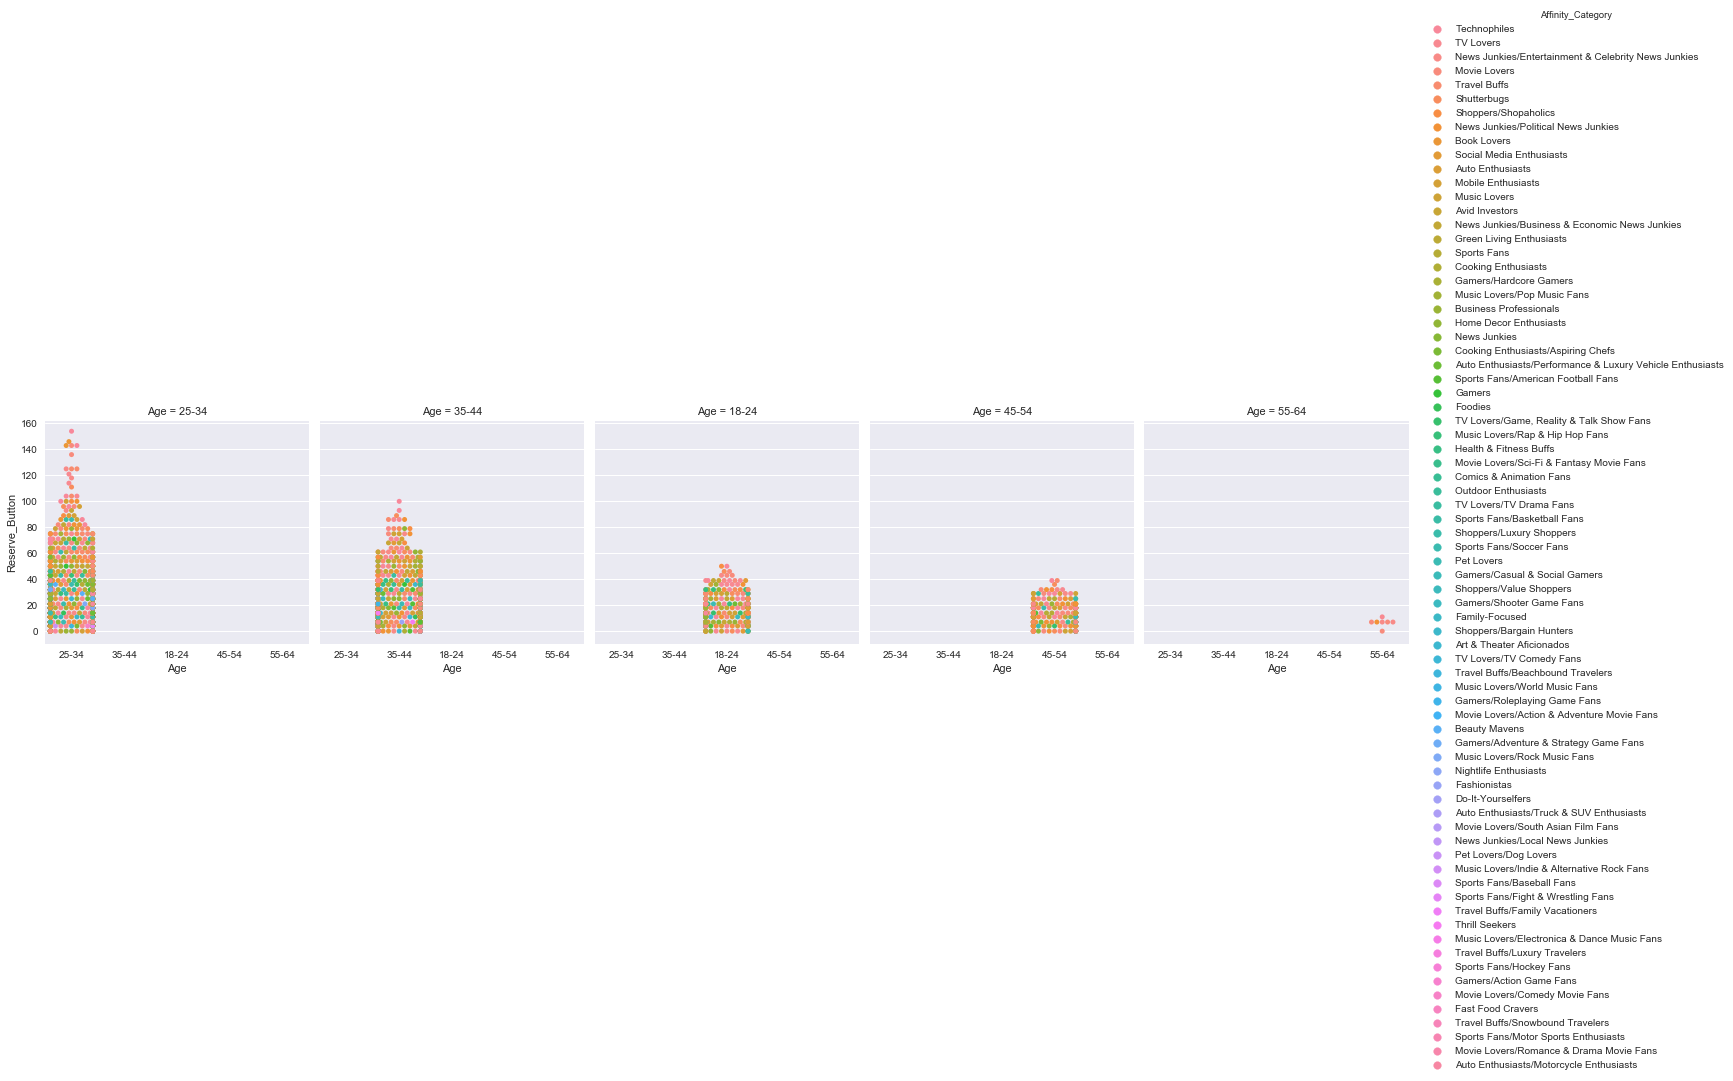

In [47]:
sns.factorplot(x="Age", y="Reserve_Button", hue="Affinity_Category",
               col="Age", data=df_csv, kind="swarm");

## Testing for Colinearity (Age, City, Gender, Affinity_Category)

1 . Test City & Age

Outcome: 
The variable City appears to have very little data and will likely have no colinearity with Age. We use scipy to conduct a test of independence quickly, given that the p-value is significantly lower than 0.05, we can say the test result does detect a significant relationship between City & Age.


In [30]:
cross_2 = pd.crosstab(df.City, df.Age)
print cross_2
chi2_contingency(cross_2)

Age            18-24  25-34  35-44  45-54  55-64
City                                            
Amsterdam          0      0      1      0      0
Atlanta            1     19     28      9      0
Austin             0     15     11      0      0
Barcelona          0      2     11      0      0
Beijing           23     95     40      0      0
Bengaluru         11     37      0      0      0
Berlin             0     28      5      0      0
Boston             0      4      0      0      0
Bucharest          0      3      0      0      0
Budapest           0      1      0      0      0
Calgary            0      1      0      0      0
Chengdu            0      2      0      0      0
Chicago           12    138     67     11      0
Dallas             3     40     28      8      0
Denver             0      2      0      0      0
Detroit            0      1      0      0      0
Dubai              0      2      0      0      0
Fremont            0     35     10      0      0
Guangzhou          1

(899.06032703806841,
 1.7084505611731196e-73,
 252L,
 array([[  7.66849250e-02,   5.03929507e-01,   3.38413908e-01,
           7.93045963e-02,   1.66706359e-03],
        [  4.37104072e+00,   2.87239819e+01,   1.92895928e+01,
           4.52036199e+00,   9.50226244e-02],
        [  1.99380805e+00,   1.31021672e+01,   8.79876161e+00,
           2.06191950e+00,   4.33436533e-02],
        [  9.96904025e-01,   6.55108359e+00,   4.39938080e+00,
           1.03095975e+00,   2.16718266e-02],
        [  1.21162181e+01,   7.96208621e+01,   5.34693975e+01,
           1.25301262e+01,   2.63396047e-01],
        [  3.68087640e+00,   2.41886163e+01,   1.62438676e+01,
           3.80662062e+00,   8.00190522e-02],
        [  2.53060252e+00,   1.66296737e+01,   1.11676590e+01,
           2.61705168e+00,   5.50130984e-02],
        [  3.06739700e-01,   2.01571803e+00,   1.35365563e+00,
           3.17218385e-01,   6.66825435e-03],
        [  2.30054775e-01,   1.51178852e+00,   1.01524172e+00,
           2

2 . Test Gender & Age

Outcome: 
As for the variable Gender, female tends to have very little data which tells us that Gender and Age will likely be independent of each other . We use scipy to conduct a test of independence quickly and as expected, given the p-value is close to 0.05, the test result does detect some significant relationship between Gender & Age.


In [31]:
cross_3 = pd.crosstab(df.Gender, df.Age)
print cross_3
chi2_contingency(cross_3)

Age     18-24  25-34  35-44  45-54  55-64
Gender                                   
female      0     46      0      0      0
male      322   2070   1421    333      7


(45.784173829290509,
 2.7311594745373167e-09,
 4L,
 array([[  3.52750655e+00,   2.31807573e+01,   1.55670398e+01,
           3.64801143e+00,   7.66849250e-02],
        [  3.18472493e+02,   2.09281924e+03,   1.40543296e+03,
           3.29351989e+02,   6.92331508e+00]]))

3 . Test Affinity_Category & Age

Outcome: Both Age and Affinity_Catgory display a large enough sample, we need to test for colinearity. We use scipy to conduct a test of independence quickly, given that the p-value is 0.07, we can say the test result does not detect a significant relationship between Affinity_Category & Age.

In [32]:
cross_1 = pd.crosstab(df.Affinity_Category, df.Age)
print cross_1
chi2_contingency(cross_1)

Age                                                 18-24  25-34  35-44  \
Affinity_Category                                                         
Art & Theater Aficionados                               0      8      5   
Auto Enthusiasts                                       11     62     44   
Auto Enthusiasts/Motorcycle Enthusiasts                 0      1      0   
Auto Enthusiasts/Performance & Luxury Vehicle E...      4     19     13   
Auto Enthusiasts/Truck & SUV Enthusiasts                0      3      0   
Avid Investors                                          7     63     48   
Beauty Mavens                                           0     14      5   
Book Lovers                                             7     51     34   
Business Professionals                                  7     51     26   
Comics & Animation Fans                                 4     22     11   
Cooking Enthusiasts                                     6     54     35   
Cooking Enthusiasts/Aspir

(307.32760936611703,
 0.31310430940526279,
 296L,
 array([[  9.96904025e-01,   6.55108359e+00,   4.39938080e+00,
           1.03095975e+00,   2.16718266e-02],
        [  9.73898547e+00,   6.39990474e+01,   4.29785663e+01,
           1.00716837e+01,   2.11717075e-01],
        [  7.66849250e-02,   5.03929507e-01,   3.38413908e-01,
           7.93045963e-02,   1.66706359e-03],
        [  3.14408192e+00,   2.06611098e+01,   1.38749702e+01,
           3.25148845e+00,   6.83496070e-02],
        [  2.30054775e-01,   1.51178852e+00,   1.01524172e+00,
           2.37913789e-01,   5.00119076e-03],
        [  9.89235532e+00,   6.50069064e+01,   4.36553941e+01,
           1.02302929e+01,   2.15051203e-01],
        [  1.45701357e+00,   9.57466063e+00,   6.42986425e+00,
           1.50678733e+00,   3.16742081e-02],
        [  7.51512265e+00,   4.93850917e+01,   3.31645630e+01,
           7.77185044e+00,   1.63372231e-01],
        [  6.74827340e+00,   4.43457966e+01,   2.97804239e+01,
           6.97

Summary: We used the Scipy Chi2 function to quickly test for independence among the independent categorical variables. We found some significant relationships between variables, but we will need to convert these categorical variables into dummy variables and test for multicollinearity at a deeper level of granuality.

## Dummy Variable Conversion & Multicolinearity Test

1 . Below I created dummy variables for each categorical independent variable and methodically dropped the least statistically significant one to avoid the dummy variable trap (n-1). Notice we see a mixture of weak significance and low R-square, but we should continue to finish the model, we can revisit this later. 

In [33]:
#Code will help us apply the appropriate models and plot 
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=10)
    # keep the model
    return algo

a. Evaluating the variable Age.

In [48]:
a = list(df.Age)
set(a)

{'18-24', '25-34', '35-44', '45-54', '55-64'}

P Values: [  4.89423493e-06   1.92347540e-26   1.56025174e-03   1.97216951e-20
   3.96291768e-02]
Coefficients: [[  2.24654491e+14   2.24654491e+14   2.24654491e+14   2.24654491e+14
    2.24654491e+14]]
y-intercept: [ -2.24654491e+14]
R-Squared: 0.037888515695

P Values: [  4.89423493e-06   1.92347540e-26   1.97216951e-20   3.96291768e-02]
Coefficients: [[ -3.09870575   4.04658186  -7.32488224 -12.46516538]]
y-intercept: [ 19.03659395]
R-Squared: 0.0390073173069
      18-24  25-34  45-54  55-64
10        0      1      0      0
18        0      1      0      0
23        0      1      0      0
26        0      1      0      0
27        0      1      0      0
29        0      1      0      0
37        0      1      0      0
39        0      1      0      0
43        0      1      0      0
44        0      1      0      0
46        0      1      0      0
49        0      1      0      0
52        0      0      0      0
53        0      1      0      0
54        0      1      0      0
58   

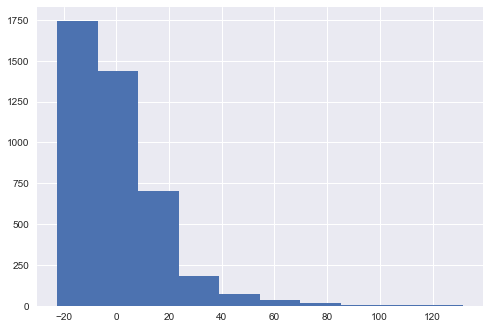

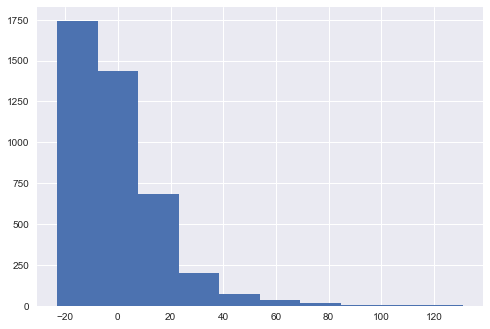

In [46]:
lm = linear_model.LinearRegression()
#Create dummy variables for Age
df_dummy1 = pd.get_dummies(df.Age)
#including all dummy variables
get_linear_model_metrics(df_dummy1[['18-24', '25-34', '35-44', '45-54', '55-64']], 
                         df[['Reserve_Button']], lm)
print
#drop the least significant predictor variable, 35-44
get_linear_model_metrics(df_dummy1[['18-24', '25-34', '45-54', '55-64']], 
                         df[['Reserve_Button']], lm)
#create new dummy variable set without Age = 35-44
df_dummy10 = df_dummy1[['18-24', '25-34', '45-54', '55-64']]

print df_dummy10

b. Evaluating City

In [49]:
c = list(df.City)
set(c)

{'Amsterdam',
 'Atlanta',
 'Austin',
 'Barcelona',
 'Beijing',
 'Bengaluru',
 'Berlin',
 'Boston',
 'Bucharest',
 'Budapest',
 'Calgary',
 'Chengdu',
 'Chicago',
 'Dallas',
 'Denver',
 'Detroit',
 'Dubai',
 'Fremont',
 'Guangzhou',
 'Hamburg',
 'Hangzhou',
 'Hong Kong',
 'Houston',
 'Irvine',
 'Istanbul',
 'Kiev',
 'Krakow',
 'Las Vegas',
 'Lisbon',
 'London',
 'Los Angeles',
 'Madrid',
 'Melbourne',
 'Mexico City',
 'Milan',
 'Montreal',
 'Mumbai',
 'Munich',
 'New York',
 'Oslo',
 'Paris',
 'Philadelphia',
 'Portland',
 'San Diego',
 'San Francisco',
 'San Jose',
 'Santa Clara',
 'Santiago',
 'Sao Paulo',
 'Seattle',
 'Seoul',
 'Shanghai',
 'Shenzhen',
 'Sofia',
 'Stockholm',
 'Sunnyvale',
 'Suzhou',
 'Sydney',
 'Tallinn',
 'Toronto',
 'Vancouver',
 'Vienna',
 'Washington',
 'Zurich'}

P Values: [  3.55906002e-01   3.96717079e-05   2.44309027e-02   6.92127435e-01
   3.78018112e-51   2.06537258e-05   1.16494056e-02   3.34334592e-01
   1.09695583e-01   4.51688108e-01   3.55906002e-01   4.09149895e-01
   2.21410146e-03   4.64813952e-04   2.35955270e-01   3.55906002e-01
   2.87099965e-01   8.54885923e-05   3.11199250e-15   3.38304735e-04
   7.67575421e-10   1.29104986e-01   4.56369746e-01   1.92251823e-01
   4.69326447e-03   6.27389336e-06   7.22899427e-01   9.59352493e-05
   4.51688108e-01   6.79741562e-03   6.61157743e-01   2.59474748e-03
   1.36076861e-03   6.47998778e-01   2.44209839e-01   1.15673011e-04
   1.02592704e-01   7.29313300e-05   1.64433457e-03   9.52772398e-01
   2.85308254e-04   1.63891511e-01   3.01916358e-02   1.36095545e-02
   7.50216823e-08   8.84469490e-04   3.88515049e-03   6.16002064e-01
   3.55906002e-01   1.30692961e-08   5.04758035e-03   2.14544519e-53
   9.21623587e-23   9.81415654e-01   1.13719091e-01   6.18294529e-01
   3.44181103e-01   3.15

KeyError: "['Moscow' 'Lagos'] not in index"

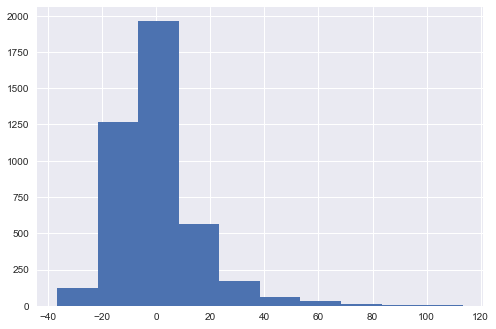

In [50]:
lm = linear_model.LinearRegression()
#Create dummy variables for City
df_dummy2 = pd.get_dummies(df.City)
#including all dummy variables
get_linear_model_metrics(df_dummy2[['Amsterdam',
 'Atlanta',
 'Austin',
 'Barcelona',
 'Beijing',
 'Bengaluru',
 'Berlin',
 'Boston',
 'Bucharest',
 'Budapest',
 'Calgary',
 'Chengdu',
 'Chicago',
 'Dallas',
 'Denver',
 'Detroit',
 'Dubai',
 'Fremont',
 'Guangzhou',
 'Hamburg',
 'Hangzhou',
 'Hong Kong',
 'Houston',
 'Irvine',
 'Istanbul',
 'Kiev',
 'Krakow',
 'Las Vegas',
 'Lisbon',
 'London',
 'Los Angeles',
 'Madrid',
 'Melbourne',
 'Mexico City',
 'Milan',
 'Montreal',
 'Mumbai',
 'Munich',
 'New York',
 'Oslo',
 'Paris',
 'Philadelphia',
 'Portland',
 'San Diego',
 'San Francisco',
 'San Jose',
 'Santa Clara',
 'Santiago',
 'Sao Paulo',
 'Seattle',
 'Seoul',
 'Shanghai',
 'Shenzhen',
 'Sofia',
 'Stockholm',
 'Sunnyvale',
 'Suzhou',
 'Sydney',
 'Tallinn',
 'Toronto',
 'Vancouver',
 'Vienna',
 'Washington']], df[['Reserve_Button']], lm)
print
#drop the least significant predictor variable, London
get_linear_model_metrics(df_dummy2[['Los Angeles', 'New York', 'Kiev', 'Munich',
       'San Francisco', 'Moscow', 'Chicago', 'Beijing', 'Lagos',
       'San Jose', 'Istanbul']], df[['Reserve_Button']], lm)
#create new dummy variable set without Age = 35-44
df_dummy20 = df_dummy2[['Los Angeles', 'New York', 'Kiev', 'Munich',
       'San Francisco', 'Moscow', 'Chicago', 'Beijing', 'Lagos',
       'San Jose', 'Istanbul']]

c. Evaluating Gender, both genders are significant, but male has a more positive effect on our outcome.

P Values: [ 0.00167152  0.00167152]
Coefficients: [[ 0.36411529 -0.36411529]]
y-intercept: [ 0.4752264]
R-Squared: 0.00762026068799

P Values: [ 0.00167152]
Coefficients: [[ 0.72823058]]
y-intercept: [ 0.11111111]
R-Squared: 0.00762026068799


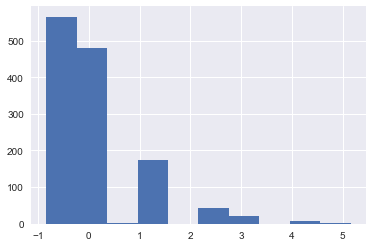

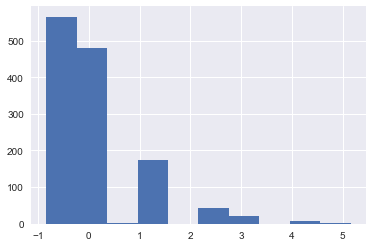

In [70]:
lm = linear_model.LinearRegression()
#Create dummy variables for Gender
df_dummy3 = pd.get_dummies(df.Gender)
#including all dummy variables
get_linear_model_metrics(df_dummy3[['male', 'female']], df_new[['Reserve_Button']], lm)
print
#drop the least significant predictor variable, female
get_linear_model_metrics(df_dummy3[['male']], df_new[['Reserve_Button']], lm)
#create new dummy variable set without Gender = female
df_dummy30 = df_dummy3[['male']]

d. Evaluating Affinity_Category. The affinity category 'Music Lovers' had the highest p-value (.98), we will exclude this variable for the sake of the dummy variable trap. However, there are other categories that have a p-value well above .05. We will take care of this later when applying the LASSO model.

P Values: [ 0.69542201  0.45273601  0.60574867  0.54388849  0.60652466  0.60353155
  0.68067849  0.28260186  0.47759798  0.44264202  0.32328424  0.64267
  0.14972786  0.99272496  0.77435639  0.35974052  0.59950318  0.0136612
  0.74579197  0.13196055  0.40059244  0.55353199  0.51127311  0.37919852
  0.98829769  0.35693025  0.87111542  0.30170437  0.50008957  0.92445577
  0.91443637  0.63375638  0.93960388  0.39625664  0.40847357  0.94664583
  0.39558386  0.16931543  0.39558386  0.23536124  0.80478238  0.39625664
  0.86131401  0.23093976  0.39625664  0.77318336  0.86131401  0.39625664]
Coefficients: [[  6.03014837e+13   6.03014837e+13   6.03014837e+13   6.03014837e+13
    6.03014837e+13   6.03014837e+13   6.03014837e+13   6.03014837e+13
    6.03014837e+13   6.03014837e+13   6.03014837e+13   6.03014837e+13
    6.03014837e+13   6.03014837e+13   6.03014837e+13   6.03014837e+13
    6.03014837e+13   6.03014837e+13   6.03014837e+13   6.03014837e+13
    6.03014837e+13   6.03014837e+13   6.03014

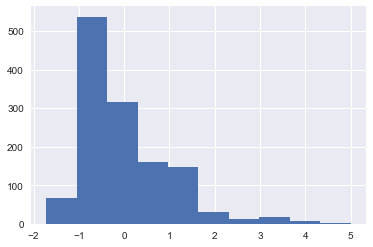

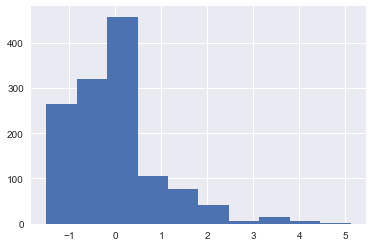

In [71]:
lm = linear_model.LinearRegression()
#Create dummy variables for Affinity_Category
df_dummy4 = pd.get_dummies(df.Affinity_Category)
#including all dummy variables
get_linear_model_metrics(df_dummy4[['Technophiles', 'Movie Lovers', 'Avid Investors',
       'Shoppers/Value Shoppers', 'Shutterbugs', 'Shoppers/Shopaholics',
       'Business Professionals', 'News Junkies/Political News Junkies',
       'Home Decor Enthusiasts', 'Auto Enthusiasts',
       'Health & Fitness Buffs', 'Business Travelers', 'TV Lovers',
       'Travel Buffs', 'Green Living Enthusiasts', 'Mobile Enthusiasts',
       'Music Lovers/Pop Music Fans',
       'News Junkies/Entertainment & Celebrity News Junkies',
       'Music Lovers', 'News Junkies/Business & Economic News Junkies',
       'Foodies', 'Comics & Animation Fans', 'Book Lovers', 'Fashionistas',
       'News Junkies', 'Cooking Enthusiasts',
       'Auto Enthusiasts/Performance & Luxury Vehicle Enthusiasts',
       'Do-It-Yourselfers', 'Sports Fans/American Football Fans',
       'Social Media Enthusiasts', 'Sports Fans',
       'Music Lovers/World Music Fans', 'Gamers',
       'Music Lovers/Rap & Hip Hop Fans', 'Outdoor Enthusiasts',
       'TV Lovers/Game, Reality & Talk Show Fans',
       'Gamers/Hardcore Gamers', 'Sports Fans/Soccer Fans',
       'Art & Theater Aficionados', 'Fast Food Cravers',
       'Travel Buffs/Beachbound Travelers', 'Nightlife Enthusiasts',
       'Sports Fans/Basketball Fans', 'Cooking Enthusiasts/Aspiring Chefs',
       'Auto Enthusiasts/Truck & SUV Enthusiasts',
       'Movie Lovers/Action & Adventure Movie Fans',
       'Travel Buffs/Luxury Travelers', 'Gamers/Roleplaying Game Fans']], df_new[['Reserve_Button']], lm)
print
#drop the least significant predictor variable, Music Lovers
get_linear_model_metrics(df_dummy4[['Technophiles', 'Movie Lovers', 'Avid Investors',
       'Shoppers/Value Shoppers', 'Shutterbugs', 'Shoppers/Shopaholics',
       'Business Professionals', 'News Junkies/Political News Junkies',
       'Home Decor Enthusiasts', 'Auto Enthusiasts',
       'Health & Fitness Buffs', 'Business Travelers', 'TV Lovers',
       'Travel Buffs', 'Green Living Enthusiasts', 'Mobile Enthusiasts',
       'Music Lovers/Pop Music Fans',
       'News Junkies/Entertainment & Celebrity News Junkies', 'News Junkies/Business & Economic News Junkies',
       'Foodies', 'Comics & Animation Fans', 'Book Lovers', 'Fashionistas',
       'News Junkies', 'Cooking Enthusiasts',
       'Auto Enthusiasts/Performance & Luxury Vehicle Enthusiasts',
       'Do-It-Yourselfers', 'Sports Fans/American Football Fans',
       'Social Media Enthusiasts', 'Sports Fans',
       'Music Lovers/World Music Fans', 'Gamers',
       'Music Lovers/Rap & Hip Hop Fans', 'Outdoor Enthusiasts',
       'TV Lovers/Game, Reality & Talk Show Fans',
       'Gamers/Hardcore Gamers', 'Sports Fans/Soccer Fans',
       'Art & Theater Aficionados', 'Fast Food Cravers',
       'Travel Buffs/Beachbound Travelers', 'Nightlife Enthusiasts',
       'Sports Fans/Basketball Fans', 'Cooking Enthusiasts/Aspiring Chefs',
       'Auto Enthusiasts/Truck & SUV Enthusiasts',
       'Movie Lovers/Action & Adventure Movie Fans',
       'Travel Buffs/Luxury Travelers', 'Gamers/Roleplaying Game Fans']], df_new[['Reserve_Button']], lm)
#create new dummy variable set without Music Lovers
df_dummy40 = df_dummy4[['Technophiles', 'Movie Lovers', 'Avid Investors',
       'Shoppers/Value Shoppers', 'Shutterbugs', 'Shoppers/Shopaholics',
       'Business Professionals', 'News Junkies/Political News Junkies',
       'Home Decor Enthusiasts', 'Auto Enthusiasts',
       'Health & Fitness Buffs', 'Business Travelers', 'TV Lovers',
       'Travel Buffs', 'Green Living Enthusiasts', 'Mobile Enthusiasts',
       'Music Lovers/Pop Music Fans',
       'News Junkies/Entertainment & Celebrity News Junkies', 'News Junkies/Business & Economic News Junkies',
       'Foodies', 'Comics & Animation Fans', 'Book Lovers', 'Fashionistas',
       'News Junkies', 'Cooking Enthusiasts',
       'Auto Enthusiasts/Performance & Luxury Vehicle Enthusiasts',
       'Do-It-Yourselfers', 'Sports Fans/American Football Fans',
       'Social Media Enthusiasts', 'Sports Fans',
       'Music Lovers/World Music Fans', 'Gamers',
       'Music Lovers/Rap & Hip Hop Fans', 'Outdoor Enthusiasts',
       'TV Lovers/Game, Reality & Talk Show Fans',
       'Gamers/Hardcore Gamers', 'Sports Fans/Soccer Fans',
       'Art & Theater Aficionados', 'Fast Food Cravers',
       'Travel Buffs/Beachbound Travelers', 'Nightlife Enthusiasts',
       'Sports Fans/Basketball Fans', 'Cooking Enthusiasts/Aspiring Chefs',
       'Auto Enthusiasts/Truck & SUV Enthusiasts',
       'Movie Lovers/Action & Adventure Movie Fans',
       'Travel Buffs/Luxury Travelers', 'Gamers/Roleplaying Game Fans']]

e. Now that we properly converted Age, City, Gender, & Affinity_Category variables into dummy variables let's bring it all together into one dataframe:

In [72]:
#Concatenate the dummy variable dataframes with the original dataframe
df_new = pd.concat([df, df_dummy10, df_dummy20, df_dummy30, df_dummy40], axis = 1)


In [73]:
#list(df_new.columns.values)
df_new.head()
len(df_new.columns)
#df_new.columns.values


67

2 . The heat map below will indicate variables that have a significant relationship

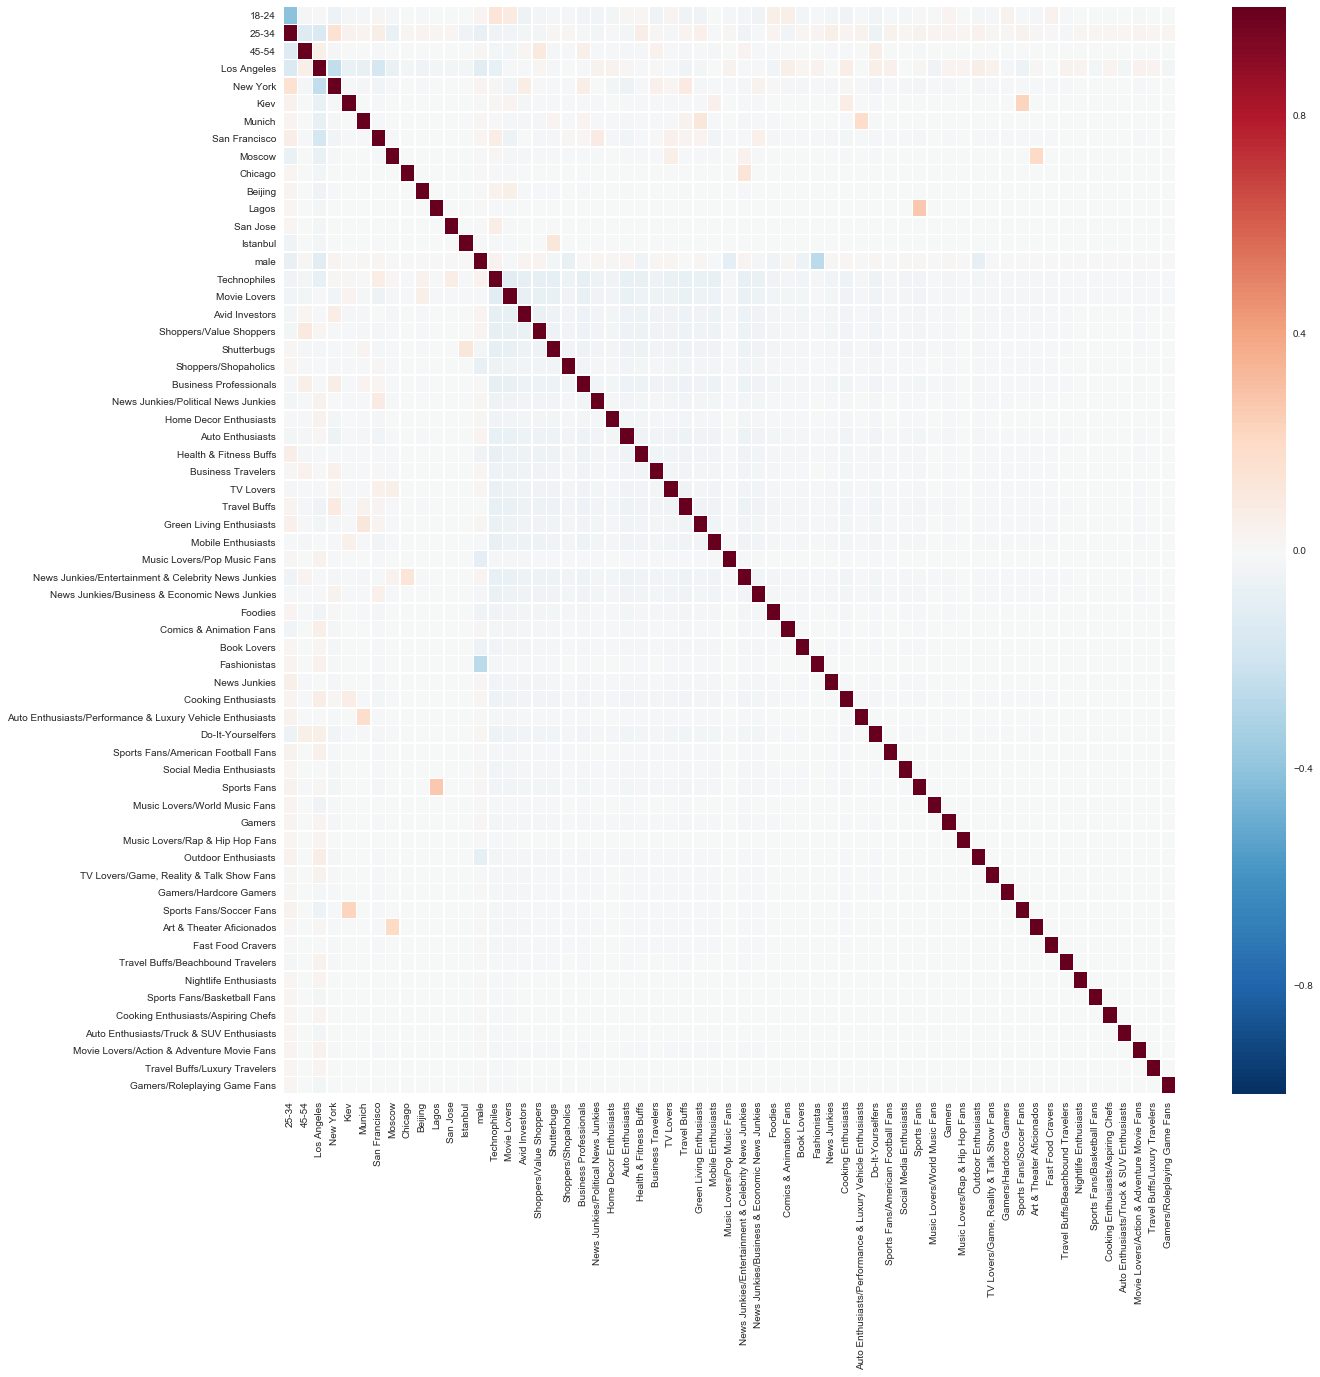

In [74]:

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df_new[[
 '18-24',
 '25-34',
 '45-54',
 'Los Angeles',
 'New York',
 'Kiev',
 'Munich',
 'San Francisco',
 'Moscow',
 'Chicago',
 'Beijing',
 'Lagos',
 'San Jose',
 'Istanbul',
 'male',
 'Technophiles',
 'Movie Lovers',
 'Avid Investors',
 'Shoppers/Value Shoppers',
 'Shutterbugs',
 'Shoppers/Shopaholics',
 'Business Professionals',
 'News Junkies/Political News Junkies',
 'Home Decor Enthusiasts',
 'Auto Enthusiasts',
 'Health & Fitness Buffs',
 'Business Travelers',
 'TV Lovers',
 'Travel Buffs',
 'Green Living Enthusiasts',
 'Mobile Enthusiasts',
 'Music Lovers/Pop Music Fans',
 'News Junkies/Entertainment & Celebrity News Junkies',
 'News Junkies/Business & Economic News Junkies',
 'Foodies',
 'Comics & Animation Fans',
 'Book Lovers',
 'Fashionistas',
 'News Junkies',
 'Cooking Enthusiasts',
 'Auto Enthusiasts/Performance & Luxury Vehicle Enthusiasts',
 'Do-It-Yourselfers',
 'Sports Fans/American Football Fans',
 'Social Media Enthusiasts',
 'Sports Fans',
 'Music Lovers/World Music Fans',
 'Gamers',
 'Music Lovers/Rap & Hip Hop Fans',
 'Outdoor Enthusiasts',
 'TV Lovers/Game, Reality & Talk Show Fans',
 'Gamers/Hardcore Gamers',
 'Sports Fans/Soccer Fans',
 'Art & Theater Aficionados',
 'Fast Food Cravers',
 'Travel Buffs/Beachbound Travelers',
 'Nightlife Enthusiasts',
 'Sports Fans/Basketball Fans',
 'Cooking Enthusiasts/Aspiring Chefs',
 'Auto Enthusiasts/Truck & SUV Enthusiasts',
 'Movie Lovers/Action & Adventure Movie Fans',
 'Travel Buffs/Luxury Travelers',
 'Gamers/Roleplaying Game Fans']].corr()

#print correlations
#print sns.heatmap(correlations, cmap=cmap)
# print sns.heatmap(correlations, vmax=1., square=True, 
#         linewidths=0.1, annot=True, annot_kws={"size":8}).xaxis.tick_top()

# sns.heatmap(correlations, vmin=data.values.min(), vmax=1, square=True, 
#         linewidths=0.1, annot=True, annot_kws={"size":2})

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(correlations.iloc[:, 1:68:], linewidths=.5, ax=ax)


## Building the Model 

Below we will fit 4 different models for fun. However, since the data in the predictor variables is so sparse we will apply the LASSO linear regression model since in this case we have more features than observations. This will helps us protect the model against overfitting by adding addional weight to the coefficients and eliminating the less significant ones (reduces insignificant coeff. to zero). However, in this model all the coefficients were reduced to zero and the R2 is basically 0, but let's continue either way. Next, we need to introduce cross validation and apply the optimal alpha via GridSearch to maximize model accuracy, currently 1.0 doesn't seem to be doing much. 

In [75]:
#It helps to easily copy and paste the necessary column values
print list(df_new.columns.values)

['Age', 'City', 'Gender', 'Affinity_Category', 'Reserve_Button', '18-24', '25-34', '45-54', 'Los Angeles', 'New York', 'Kiev', 'Munich', 'San Francisco', 'Moscow', 'Chicago', 'Beijing', 'Lagos', 'San Jose', 'Istanbul', 'male', 'Technophiles', 'Movie Lovers', 'Avid Investors', 'Shoppers/Value Shoppers', 'Shutterbugs', 'Shoppers/Shopaholics', 'Business Professionals', 'News Junkies/Political News Junkies', 'Home Decor Enthusiasts', 'Auto Enthusiasts', 'Health & Fitness Buffs', 'Business Travelers', 'TV Lovers', 'Travel Buffs', 'Green Living Enthusiasts', 'Mobile Enthusiasts', 'Music Lovers/Pop Music Fans', 'News Junkies/Entertainment & Celebrity News Junkies', 'News Junkies/Business & Economic News Junkies', 'Foodies', 'Comics & Animation Fans', 'Book Lovers', 'Fashionistas', 'News Junkies', 'Cooking Enthusiasts', 'Auto Enthusiasts/Performance & Luxury Vehicle Enthusiasts', 'Do-It-Yourselfers', 'Sports Fans/American Football Fans', 'Social Media Enthusiasts', 'Sports Fans', 'Music Lovers

In [76]:
X =df_new[['18-24', '25-34', '45-54', 'Los Angeles', 'New York', 'Kiev', 'Munich', 'San Francisco', 'Moscow', 'Chicago', 'Beijing', 'Lagos', 'San Jose', 'Istanbul', 'male', 'Technophiles', 'Movie Lovers', 'Avid Investors', 'Shoppers/Value Shoppers', 'Shutterbugs', 'Shoppers/Shopaholics', 'Business Professionals', 'News Junkies/Political News Junkies', 'Home Decor Enthusiasts', 'Auto Enthusiasts', 'Health & Fitness Buffs', 'Business Travelers', 'TV Lovers', 'Travel Buffs', 'Green Living Enthusiasts', 'Mobile Enthusiasts', 'Music Lovers/Pop Music Fans', 'News Junkies/Entertainment & Celebrity News Junkies', 'News Junkies/Business & Economic News Junkies', 'Foodies', 'Comics & Animation Fans', 'Book Lovers', 'Fashionistas', 'News Junkies', 'Cooking Enthusiasts', 'Auto Enthusiasts/Performance & Luxury Vehicle Enthusiasts', 'Do-It-Yourselfers', 'Sports Fans/American Football Fans', 'Social Media Enthusiasts', 'Sports Fans', 'Music Lovers/World Music Fans', 'Gamers', 'Music Lovers/Rap & Hip Hop Fans', 'Outdoor Enthusiasts', 'TV Lovers/Game, Reality & Talk Show Fans', 'Gamers/Hardcore Gamers', 'Sports Fans/Soccer Fans', 'Art & Theater Aficionados', 'Fast Food Cravers', 'Travel Buffs/Beachbound Travelers', 'Nightlife Enthusiasts', 'Sports Fans/Basketball Fans', 'Cooking Enthusiasts/Aspiring Chefs', 'Auto Enthusiasts/Truck & SUV Enthusiasts', 'Movie Lovers/Action & Adventure Movie Fans', 'Travel Buffs/Luxury Travelers', 'Gamers/Roleplaying Game Fans']]

y = df_new['Reserve_Button']
print len(X.columns.values)

62


In [17]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.logspace(-10, 10, 21)
# create and fit a ridge regression model, testing each alpha, setting cross-validation fold to 5
model = linear_model.Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv=5)
grid.fit(X,y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
-0.0386819745276
0.01


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
P Values: [  1.36614398e-01   1.68797172e-01   1.20532459e-01   7.24863903e-01
   2.53947018e-04   1.49301614e-01   2.77014572e-01   2.18381621e-01
   4.69489252e-08   2.62400209e-02   8.04782376e-01   3.96256642e-01
   3.96256642e-01   8.61314007e-01   1.67152231e-03   6.95422010e-01
   4.52736007e-01   6.05748675e-01   5.43888488e-01   6.06524660e-01
   6.03531555e-01   6.80678492e-01   2.82601857e-01   4.77597981e-01
   4.42642024e-01   3.23284238e-01   6.42669999e-01   1.49727859e-01
   9.92724956e-01   7.74356389e-01   3.59740525e-01   5.99503181e-01
   1.36611954e-02   1.31960553e-01   4.00592443e-01   5.53531990e-01
   5.11273110e-01   3.79198516e-01   9.88297693e-01   3.56930246e-01
   8.71115416e-01   3.01704371e-01   5.00089571e-01   9.24455767e-01
   9.14436367e-01   6.33756379e-01   9.39603881e-01   3.96256642e-01
   4.08473568e-01   9.46645830e-01   3.95583861e-01   1.69315428e-01
   3.95583861e-0

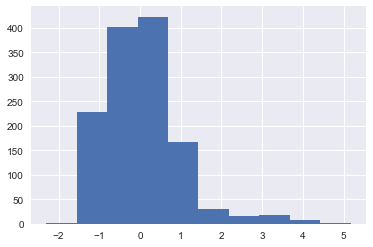

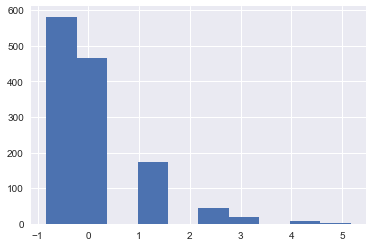

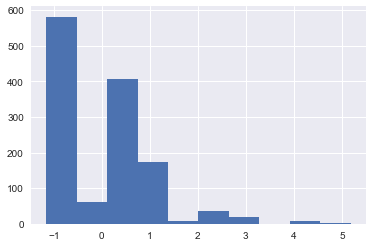

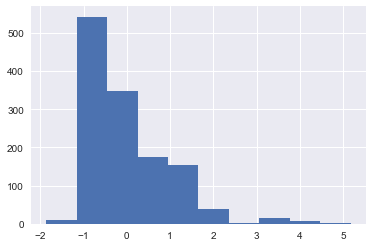

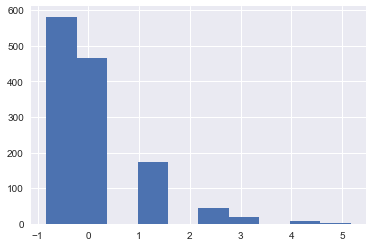

In [77]:
from sklearn import feature_selection, linear_model, metrics
import numpy as np
import pandas as pd

kf = cross_validation.KFold(len(X), n_folds=5, shuffle=True)

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    print 'Mean squared error:', metrics.mean_squared_error(y, algo.predict(X))
    plt.figure()
    plt.hist(residuals, bins=10)
    # keep the model
    return algo

#X =df_new[['25-34', 'New York', 'News Junkies/Entertainment & Celebrity News Junkies']]
X =df_new[['18-24', '25-34', '45-54', 'Los Angeles', 'New York', 'Kiev', 'Munich', 'San Francisco', 'Moscow', 'Chicago', 'Beijing', 'Lagos', 'San Jose', 'Istanbul', 'male', 'Technophiles', 'Movie Lovers', 'Avid Investors', 'Shoppers/Value Shoppers', 'Shutterbugs', 'Shoppers/Shopaholics', 'Business Professionals', 'News Junkies/Political News Junkies', 'Home Decor Enthusiasts', 'Auto Enthusiasts', 'Health & Fitness Buffs', 'Business Travelers', 'TV Lovers', 'Travel Buffs', 'Green Living Enthusiasts', 'Mobile Enthusiasts', 'Music Lovers/Pop Music Fans', 'News Junkies/Entertainment & Celebrity News Junkies', 'News Junkies/Business & Economic News Junkies', 'Foodies', 'Comics & Animation Fans', 'Book Lovers', 'Fashionistas', 'News Junkies', 'Cooking Enthusiasts', 'Auto Enthusiasts/Performance & Luxury Vehicle Enthusiasts', 'Do-It-Yourselfers', 'Sports Fans/American Football Fans', 'Social Media Enthusiasts', 'Sports Fans', 'Music Lovers/World Music Fans', 'Gamers', 'Music Lovers/Rap & Hip Hop Fans', 'Outdoor Enthusiasts', 'TV Lovers/Game, Reality & Talk Show Fans', 'Gamers/Hardcore Gamers', 'Sports Fans/Soccer Fans', 'Art & Theater Aficionados', 'Fast Food Cravers', 'Travel Buffs/Beachbound Travelers', 'Nightlife Enthusiasts', 'Sports Fans/Basketball Fans', 'Cooking Enthusiasts/Aspiring Chefs', 'Auto Enthusiasts/Truck & SUV Enthusiasts', 'Movie Lovers/Action & Adventure Movie Fans', 'Travel Buffs/Luxury Travelers', 'Gamers/Roleplaying Game Fans']]

y = df_new['Reserve_Button']


estimators = [
    linear_model.LinearRegression(),
#Lasso without optimal alpha
    linear_model.Lasso(),
#Lasso with optimal alpha, for comparison purposes
    linear_model.Lasso(alpha=.01),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(X, y, est)
    print

Parameter tunning & CS made an improvement in significance, but that was not enough to have predictive power. Let's peel back the onion:

## Peeling Back the Onion

Let's go back to square one and take a look at our predictor variables: City, Age, Gender, & Technophiles (keeping this short as there are over 40 categories).

1 . City & Reserve_Button

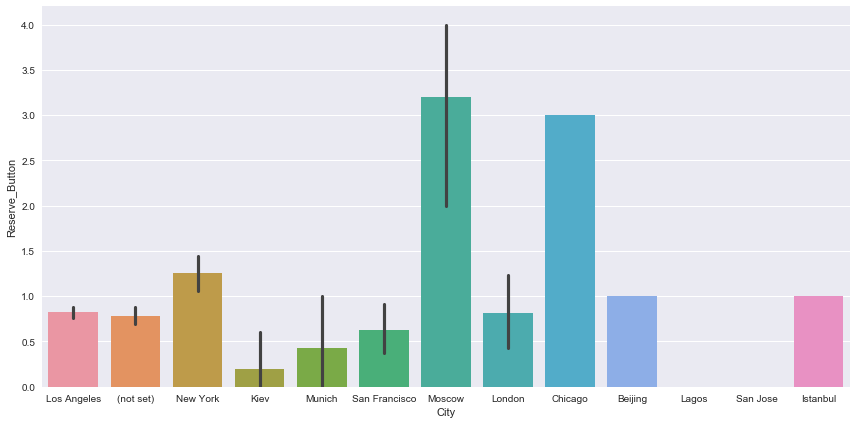

In [52]:
# f, ax = plt.subplots(figsize=(7, 3))
sns.factorplot(x = 'City', y = 'Reserve_Button', data = df, kind='bar', size=6, aspect=2)




2 . Age & Reserve_Button

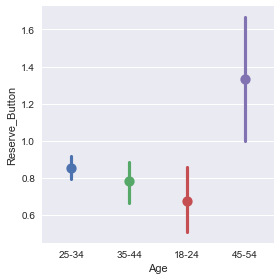

In [55]:
sns.factorplot(x = 'Age', y = 'Reserve_Button', data = df, hue='Age')

3 . Gender & Reserve_Button: There is a significant relationship with gender. The mean spread for male is much lower than for female and there is no overlap. 

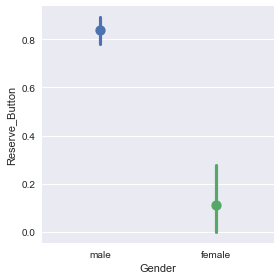

In [56]:
sns.factorplot(x = 'Gender', y = 'Reserve_Button', data = df, hue='Gender')

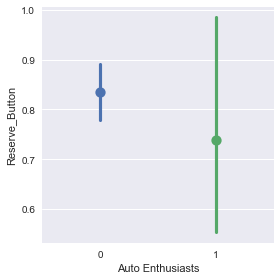

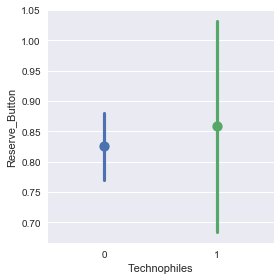

In [57]:
#There is a lot of overlap between the affinity_Category variables
sns.factorplot(x='Auto Enthusiasts', y="Reserve_Button", data=df_new, hue='Auto Enthusiasts')
sns.factorplot(x='Technophiles', y="Reserve_Button", data=df_new, hue='Technophiles');

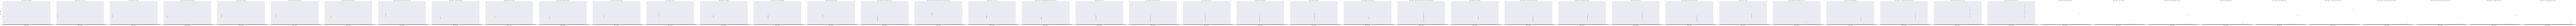

In [83]:
sns.factorplot(x="Affinity_Category", y="Reserve_Button", hue="Affinity_Category",
               col="Affinity_Category", data=df, size=6, aspect=2);

Conclusion: Even though City, Age, Gender, & Technophiles  is correlated with our predictor variable (Reserve_Button), the predicted power is not robust enough. The visualizations on top show's that there is some overlap between the predictor variables and there is not enough data amongst other predictor variables to compensate for this.   

In order to improve the model we need to collect more data about reserve button clicks or need finer granuality.



## Appendix - Fun

Cross-Validation (for theoretical fun): This technique swaps bias error for generalized error, describing previous
trends accurately enough to extend to future trends. Below the MSE for a single model is much lower than the Mean MSE, but we're trading off bias error for generalized error.

In [ ]:
from sklearn import cross_validation
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
kf = cross_validation.KFold(len(X), n_folds=5, shuffle=True)

In [81]:
mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(X.iloc[test_index])))
    scores.append(lm.score(X, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 6.86846294904e+24
R2: -1.44013240787e+24
Model 2
MSE: 1.01633348472
R2: 0.0644437525773
Model 3
MSE: 1.39317255603e+25
R2: -2.92110907867e+24
Model 4
MSE: 5.55497530589e+24
R2: -1.16472928838e+24
Model 5
MSE: 9.48719499554e+24
R2: -1.98152991211e+24
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 7.16847176216e+24
Mean of R2 for all folds: -1.50150013741e+24


In [82]:
lm = linear_model.LinearRegression().fit(X, y)
print "~~~~ Single Model ~~~~"
print 'MSE of single model:', metrics.mean_squared_error(y, lm.predict(X))
print 'R2: ', lm.score(X, y)

~~~~ Single Model ~~~~
MSE of single model: 0.880471367342
R2:  0.0776566658935
